### PHYS 270 Assignment 6: Least-Squares Regression

Student Name: Rakhat Zhussupkhanov

#**ABSTRACT**

In this assignment, model that could derive velocity formulae to fit experimental data was built with help of linear least-square regression. A set noisy velocity values was used as data. To be more exact, linear, exponential and polynomial equations were investigated. The results revealed that the exponential formula is best fit into the data.

# **INTRODUCTION**

Nowadays people (especially data analysts) work with large amounts of data, which is not always perfect since there are often some noises, omitted values, unavailable values, etc. Specialists usually use regression to solve this problem. Namely, they try find such a function, values of which fit the data the best. With regression, data with the least error can be obtained.



# **METHODS**

This assignments implements least-squares method of regression, which uses least square approximation. If we suppose that our function is $$y = kx + b,$$ using the square of difference between a true value and a predicted one, we find the slope that fits the function best: $$\frac{\sum(x - x_{mean})(y - y_{mean})}{\sum(x - x_{mean})^2} $$ Then, we get  $$b = y - kx $$
To estimate the error, the best method is to calculate root-mean square error, whose is formula is the following: $$\sum \sqrt{(\frac{1}{n}(y_{true} - y_{predicted})^2} $$

The method will investigate these equations:



1.   $f(x) = a_0 + a_1x$ (linear)
2.   $f(x) = a_0e^{a_1x}$ (exponential)
3.   $f(x) = a_0 + a_1x + a_2x^2 $ (polynomial)



First, we import the necessary libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data:

In [ ]:
path = 'https://drive.google.com/uc?export=download&id=1RBXwhNt6BMpkiaS3GhsTFcHuSVBvqfnG'
data = pd.read_csv(path)

Implement the function for the least-squares method:

In [ ]:
def least_squares(x, y):
  return np.sum((x - np.mean(x)) * (y  - np.mean(x)))/np.sum((x - np.mean(x)) ** 2), np.mean(np.mean(y) - np.sum((x - np.mean(x)) * (y  - np.mean(x)))/np.sum((x - np.mean(x)) ** 2) *np.mean(x))

Implementing the RMS function:

In [ ]:
def rms(true, predicted):
  return np.sqrt(np.sum(1/true.shape[0] * (true - predicted)**2))

In [ ]:
time = data["Time"]
voltage = data["Voltage"]
k, b = least_squares(time, voltage)
k, b

(-7.527549384283313, 7.670451687058824)

Calculating the predicted values:

In [ ]:
predicted = k * time + b

In [ ]:
rms(voltage, predicted)

0.6385467391118245

The RMS seems to be too big.

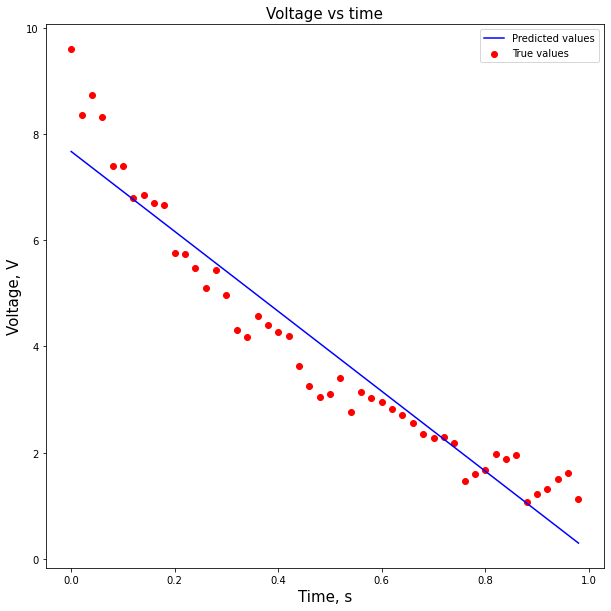

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Voltage vs time", fontsize=15)
ax.set_xlabel("Time, s",  fontsize=15)
ax.set_ylabel("Voltage, V",  fontsize=15)

ax.scatter(time, voltage, label="True values", c = "r")
ax.plot(time, predicted, label="Predicted values", c="b")

plt.legend()
plt.show()

The equation of the best fit is $V(t) = -7.528t + 7.67$, which seems not to fit the data well because the original data does not resemble linear function.

**EXPONENTIAL FIT**

Least-squares method cannot deal with nonlinear equations, which is why we apply natural logarithm to both sides of the exponential equation we have: $$V(t) = ke^{at}$$
$$\ln{V(t)} = \ln{k} + \ln{e^{at}} $$
$$\ln{V(t)} = \ln{k} + at$$

As $\ln{k}$ is a constant, the function is linear. Hence, we can use the least-squares method.

In [ ]:
log_v = np.log(data["Voltage"])
a, k = least_squares(time, log_v)
a, k

(-2.0300343269602203, 2.207511025806423)

In [ ]:
predicted = np.exp(k + a * time)

In [ ]:
rms(voltage, predicted)

0.2673926108863833

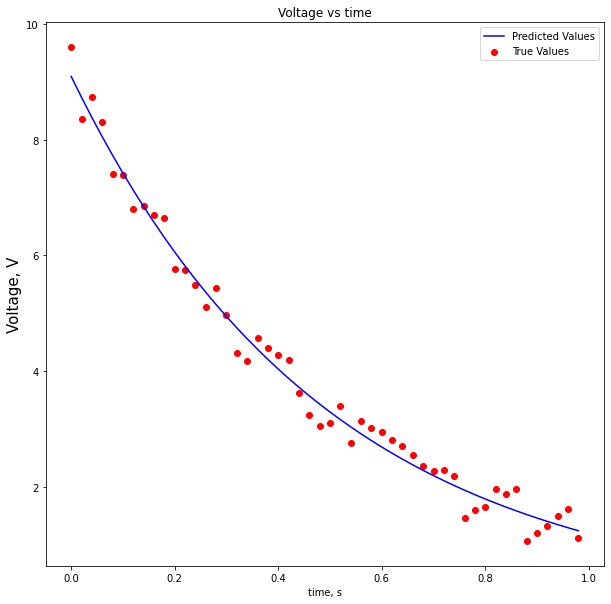

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Voltage vs time")
ax.set_xlabel("time, s")
ax.set_ylabel("Voltage, V",  fontsize=15)

ax.scatter(time, voltage, label="True Values", c="r")
ax.plot(time, predicted, label="Predicted Values", c="b")

plt.legend()
plt.show()

The RMS in this part is much better. Therefore, exponential fit is more accurate. It also can be seen from the graph, the curve fits the data better.

**POLYNOMIAL FIT**

The coefficients of the function can be calculated using linear algebra and matrices:

In [ ]:
time = data["Time"]
voltage = data["Voltage"]
A = np.array([[np.size(time), np.sum(time), np.sum(time**2)],
            [np.sum(time), np.sum(time**2), np.sum(time**3)],
            [np.sum(time**2), np.sum(time**3), np.sum(time**4)]])
b = np.array([np.sum(voltage), np.sum(time*voltage), np.sum(time**2*voltage)])
x = np.linalg.solve(A, b)

In [ ]:
x

array([  8.85774677, -14.94814368,   7.572035  ])

In [ ]:
predicted = x[0] + x[1] * time + x[2] * time**2

In [ ]:
rms(voltage, predicted)

0.29974498029446817

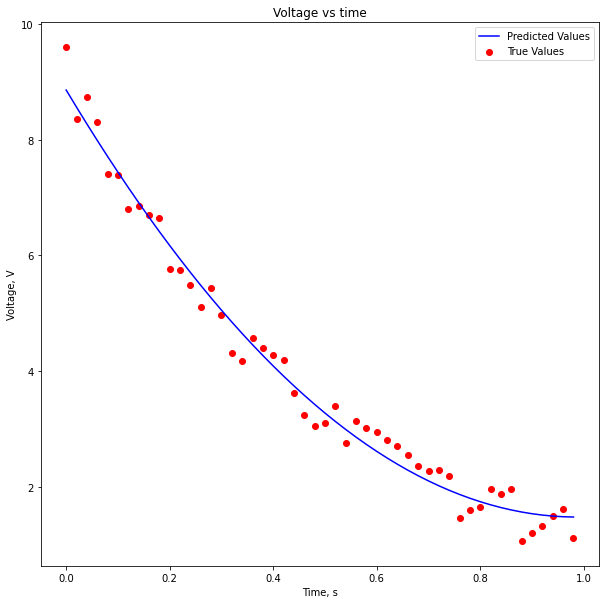

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Voltage vs time")
ax.set_xlabel("Time, s")
ax.set_ylabel("Voltage, V")

ax.scatter(time, voltage, label="True Values", c="r")
ax.plot(time, predicted, label="Predicted Values", c="b")

plt.legend()
plt.show()

The polynomial function is $8.86 - 14.95t +  7.57t^2$. Although the polynomial form fits the data well, too, its RMS is greater than that of the exponential fit.

# **RESULTS AND CONCLUSION**

Let us compare the RMSE of each part:

Linear fit - $0.6385467391118245$

Exponential fit - $0.2673926108863833$

Polynomial fit - $0.29974498029446817$

Looking at these results and the graphs, we can conclude that the exponential equation fits the data best, which is why it could be better to use such equations. However, the RMSE is still relatively high. It could happen due to the student using an old voltmeter or a capacitor being in use.